# Sea level prediction
programming for business intelligence
/ Tae Young Moon

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [6]:
glob = pd.read_csv('combined.csv')  

In [7]:
glob

,Year,Sea level,Temperature
0,1993,NaN,0.28
1,1994,NaN,0.35
2,1995,NaN,0.47
3,1996,NaN,0.32
4,1997,NaN,0.52
...,...,...,...
1278,2021,70.18,NaN
1279,2021,71.28,NaN
1280,2021,72.48,NaN
1281,2021,73.58,NaN


In [8]:
x = glob['Year']            
y1 = glob['Sea level']
y2 = glob['Temperature']

In [9]:
a = pd.Series([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])   # expand the year

In [10]:
sea_glob = glob[27:].drop(['Temperature'], axis = 1)                 # dorp tempertature from low 28, axis = 1 
years2 = sea_glob['Year'].drop_duplicates()                          # year 2.
avg_of_sealevel = sea_glob.groupby('Year').mean()['Sea level']       # average of sea level


In [11]:
temp_glob = glob[:27]                                                # tempertuare value[0:17]
years = temp_glob['Year'].drop_duplicates()                          # Drop year values 
regression_years = years.append(a)                                   # Add expended years

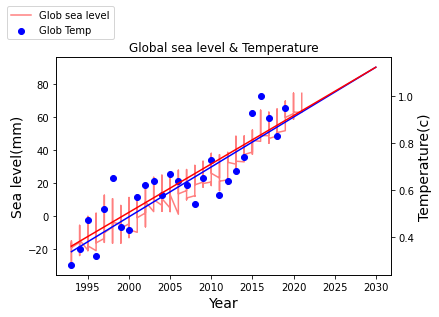

In [12]:

fig, ax1 = plt.subplots()  # create subplots

ax1.plot(x, y1, label = "Glob sea level", color='r', alpha = 0.5)     # Plot data 'year' and 'sea level' vlaues 
ax1.set_xlabel('Year', fontsize = 14)                                 # x label
ax1.set_ylabel('Sea level(mm)', fontsize = 14)                       # y label

ax2 = ax1.twinx()                                                    # twin x, create another y range 
ax2.scatter(x, y2, label = "Glob Temp", color = 'b')                 # Scatter temperature values
ax2.set_ylabel('Temperature(c)', fontsize = 14)                      # y2 label 

model1 = LinearRegression()                                 # Linear Regression
model1.fit(years2.values.reshape(-1,1), avg_of_sealevel)    

ax1.plot(regression_years, model1.predict(regression_years.values.reshape(-1,1)), color='b')
                                                                        # plot the line
temperature = temp_glob['Temperature'].dropna()                         # Temperature



model2 = LinearRegression()                                  # linear Regression
model2.fit(years.values.reshape(-1,1), temperature)      

ax2.plot(regression_years, model2.predict(regression_years.values.reshape(-1,1)), color='r')
                                                                       # Plot the line
fig.legend(loc='center left', bbox_to_anchor=(0,1))                    # legend

plt.title('Global sea level & Temperature')                            # title
plt.show()

In [13]:
X = years2.values.reshape(-1,1)
y = avg_of_sealevel

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 9.67


In [16]:
model.score(X_test, y_test)

0.9857960423523413